### Imports

In [ ]:
import keras.losses
import numpy as np
import pandas as pd
import os

In [ ]:
import importlib
import My_PythonPackage.nlp_utils as nlp_utils
importlib.reload(nlp_utils)

<module 'My_PythonPackage.nlp_utils' from 'C:\\Users\\guimi\\Documents\\Python_Projects\\My_PythonPackage\\nlp_utils.py'>

### Importing datasets

In [ ]:
df_train_raw = pd.read_csv('../../Datasets/nlp-getting-started/train.csv')
df_test_raw = pd.read_csv('../../Datasets/nlp-getting-started/test.csv')

In [ ]:
df_train_raw.sample(20)

,id,keyword,location,text,target
3255,4677,engulfed,"Rochester, NY",When Your Cake Is Engulfed In Flames #Literary...,0
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
6786,9722,tragedy,"Harper Woods, MI",A real life tragedy:\r\nMonica's hair on any g...,0
12,18,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 1...,1
4796,6823,loud%20bang,Kenya,Jrowah: Breaking news! Unconfirmed! I just hea...,1
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0
5581,7963,razed,"Tulsa, OK",The Latest: More homes razed by Northern Calif...,1
7232,10358,weapons,NaN,Ukraine argues for US weapons during Pelosi's ...,1
6521,9325,survive,? icon by @Hashiren_3 ?,@mochichiiiii @hikagezero IT'S IMPOSSIBLE FOR ...,0
2877,4135,drought,"Rock Hill, SC",Large rain drops falling in Rock Hill off Ande...,0


In [ ]:
print((df_train_raw.target == 1).sum())
print((df_train_raw.target == 0).sum())

3271
4342


### Data Preprocessing

In [ ]:
stop_words = nlp_utils.usingStopwords('en')
df_train = df_train_raw.copy()

## Train data Preprocessing
df_train['text'] = df_train['text'].map(lambda x: nlp_utils.remove_URL(x))
df_train['text'] = df_train['text'].map(lambda x: nlp_utils.remove_punct(x))
df_train['text'] = df_train['text'].map(lambda x: x.lower())
df_train['text'] = df_train['text'].map(lambda x: nlp_utils.removeStopwords(x,stop_words))

## Test data preprocessing
df_test = df_test_raw.copy()
df_test['text'] = df_test['text'].map(lambda x: nlp_utils.remove_URL(x))
df_test['text'] = df_test['text'].map(lambda x: nlp_utils.remove_punct(x))
df_test['text'] = df_test['text'].map(lambda x: x.lower())
df_test['text'] = df_test['text'].map(lambda x: nlp_utils.removeStopwords(x,stop_words))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train.tail(20)

,id,keyword,location,text,target
7593,10848,NaN,NaN,heard really loud bang everyone asleep great,0
7594,10849,NaN,NaN,gas thing exploded heard screams whole street ...,1
7595,10850,NaN,NaN,nws flash flood warning continued shelby count...,1
7596,10851,NaN,NaN,rt livingsafely nws issues severe thunderstorm...,1
7597,10852,NaN,NaN,mh370 aircraft debris found la reunion missing...,1
7598,10853,NaN,NaN,fatherofthree lost control car overtaking coll...,1
7599,10854,NaN,NaN,13 earthquake 9km ssw anza california iphone u...,1
7600,10855,NaN,NaN,evacuation order lifted town roosevelt,1
7601,10859,NaN,NaN,breaking la refugio oil spill may costlier big...,1
7602,10860,NaN,NaN,siren went wasnt forney tornado warning,1


### Selecting variables for model

In [ ]:
X = df_train.text
y = df_train.target

### Splitting data into train and test

In [ ]:
# OBS: Using df_traing for train, validation and test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8,random_state=42)



### Vocabulary

In [ ]:
tokens, vocab, vocab_size = nlp_utils.createVocabulary(X_train)

In [ ]:
# get 5 words with highest frequency from vocab
ranking = nlp_utils.getWordsHigherFrequencyCorpus(vocab,5)
ranking

[('like', 223), ('amp', 191), ('im', 187), ('fire', 156), ('get', 154)]

### Train Numericalização

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
max_len = nlp_utils.findMaxLen(train_sequences)
max_len

25

### Train padding

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')

### Validation Numericalization and Padding

In [ ]:
val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
embeddings_dict = {}
with open('../../Assets/glove.twitter.27B.25d.txt','r',encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vectors
f.close()

In [ ]:
embeddings_matrix = np.zeros((vocab_size+1,25))
for word, i in word_index.items():
    embeddings_vector = embeddings_dict.get(word)
    if embeddings_vector is not None:
        embeddings_matrix[i-1] = embeddings_vector


In [ ]:
word_index['reason']

730

In [ ]:
embeddings_matrix[1796]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embeddings_dict['reason']

array([ 0.43525  ,  0.41565  , -0.0049016,  0.33494  , -0.093569 ,
        0.0231   ,  1.8699   , -0.57324  , -0.61937  ,  0.11542  ,
       -0.90317  ,  0.59846  , -4.3689   ,  0.15006  ,  0.03712  ,
        0.52517  ,  0.052408 , -0.22282  ,  0.57383  , -0.55142  ,
        0.65294  ,  0.43788  ,  0.37033  ,  0.12756  , -0.73918  ],
      dtype=float32)

### RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.initializers.initializers_v2 import Constant


In [36]:
model = Sequential([
    Embedding(input_dim=vocab_size+1, output_dim= 25,embeddings_initializer=Constant(embeddings_matrix), input_length=max_len,trainable=False),
    LSTM(256, dropout=0.1),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 25)            335875    
                                                                 
 lstm_1 (LSTM)               (None, 256)               288768    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 624,900
Trainable params: 289,025
Non-trainable params: 335,875
_________________________________________________________________


In [37]:
loss = BinaryCrossentropy(from_logits=False)
optim = Adam(learning_rate=0.001)
metrics = ['accuracy']
model.compile(loss=loss, optimizer=optim, metrics=metrics)
history = model.fit(train_padded, y_train, epochs=20, validation_data=(val_padded, y_val),verbose=2)

Epoch 1/20
153/153 - 19s - loss: 0.6807 - accuracy: 0.5759 - val_loss: 0.6786 - val_accuracy: 0.5821 - 19s/epoch - 122ms/step
Epoch 2/20
153/153 - 13s - loss: 0.6729 - accuracy: 0.5856 - val_loss: 0.6688 - val_accuracy: 0.5969 - 13s/epoch - 88ms/step
Epoch 3/20
153/153 - 11s - loss: 0.6636 - accuracy: 0.6010 - val_loss: 0.6755 - val_accuracy: 0.5632 - 11s/epoch - 74ms/step
Epoch 4/20
153/153 - 13s - loss: 0.6569 - accuracy: 0.6133 - val_loss: 0.6802 - val_accuracy: 0.5427 - 13s/epoch - 82ms/step
Epoch 5/20
153/153 - 9s - loss: 0.6475 - accuracy: 0.6301 - val_loss: 0.6704 - val_accuracy: 0.5698 - 9s/epoch - 60ms/step
Epoch 6/20
153/153 - 9s - loss: 0.6330 - accuracy: 0.6414 - val_loss: 0.7094 - val_accuracy: 0.5722 - 9s/epoch - 59ms/step
Epoch 7/20
153/153 - 9s - loss: 0.6185 - accuracy: 0.6593 - val_loss: 0.6705 - val_accuracy: 0.6223 - 9s/epoch - 59ms/step
Epoch 8/20
153/153 - 10s - loss: 0.6089 - accuracy: 0.6739 - val_loss: 0.7175 - val_accuracy: 0.5722 - 10s/epoch - 66ms/step
Epoch

In [38]:
import matplotlib.pyplot as plt

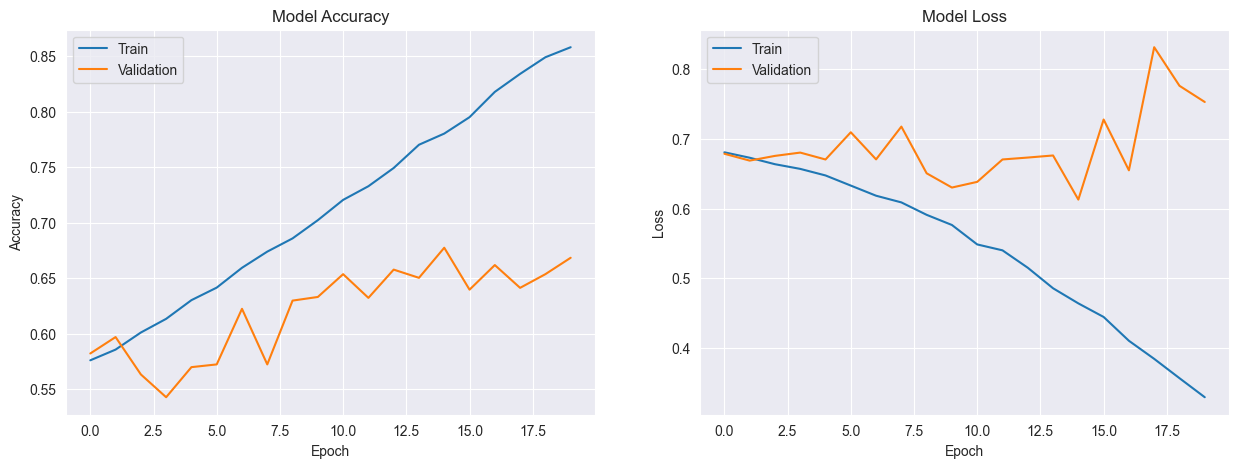

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Predictions

In [40]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [41]:
index_word = nlp_utils.index2word(word_index)

In [42]:
pred_prob = model.predict(test_padded)
pred_int = pred_prob.round().astype('int')
pred_int

48/48 [==============================] - 2s 26ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [43]:
pred_prob

array([[0.0969881 ],
       [0.29450005],
       [0.4279064 ],
       ...,
       [0.8676108 ],
       [0.9854014 ],
       [0.81804276]], dtype=float32)

In [44]:
y_pred = [1 if p > 0.5 else 0 for p in pred_prob]

In [45]:
df_results = pd.DataFrame()
X_test = list(X_test)
y_test = list(y_test)
df_results['sequence'] = test_sequences
df_results['X_test'] = X_test
df_results['seq2text'] = df_results['sequence'].apply(lambda x: nlp_utils.seq2text(x, index_word))
df_results['y_pred'] = y_pred
df_results['y_true'] = y_test
df_results

,sequence,X_test,seq2text,y_pred,y_true
0,"[8, 165, 230, 1, 317]",new weapon cause unimaginable destruction,"[new, weapon, cause, <OOV>, destruction]",0,1
1,"[1, 273, 1, 31, 1, 257, 38, 1, 1, 2783, 10664]",famping things gishwhes got soaked deluge goin...,"[<OOV>, things, <OOV>, got, <OOV>, deluge, goi...",0,0
2,"[1, 1, 52, 1, 5323, 11508, 37, 4342, 1, 1, 1]",dt georgegalloway rt galloway4mayor ûïthe col...,"[<OOV>, <OOV>, rt, <OOV>, ûïthe, col, police,...",0,1
3,"[749, 27, 72, 1680, 109, 59, 305, 134, 409, 45...",aftershock back school kick great want thank e...,"[aftershock, back, school, kick, great, want, ...",0,0
4,"[1153, 291, 496, 1, 8505, 1, 659, 12, 1, 1, 41]",response trauma children addicts develop defen...,"[response, trauma, children, <OOV>, develop, <...",1,0
...,...,...,...,...,...
1518,"[1, 1, 260, 44, 2984]",smusx16475 skype crashed u host,"[<OOV>, <OOV>, crashed, u, host]",1,0
1519,"[992, 226, 993, 762, 892, 1102, 534, 757, 7, 9...",christian attacked muslims temple mount waving...,"[christian, attacked, muslims, temple, mount, ...",1,1
1520,"[29, 298, 94, 23, 159, 1, 4052, 1, 7, 1]",man charged fatal crash near dubbo refused bai...,"[man, charged, fatal, crash, near, <OOV>, refu...",1,1
1521,"[5242, 422, 173, 3277, 864, 444, 1157, 5243, 1...",usnwsgov severe weather statement issued augus...,"[usnwsgov, severe, weather, statement, issued,...",1,1


### Evaluating Model

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)


In [48]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       874
           1       0.57      0.58      0.58       649

    accuracy                           0.64      1523
   macro avg       0.63      0.63      0.63      1523
weighted avg       0.64      0.64      0.64      1523

Confusion Matrix


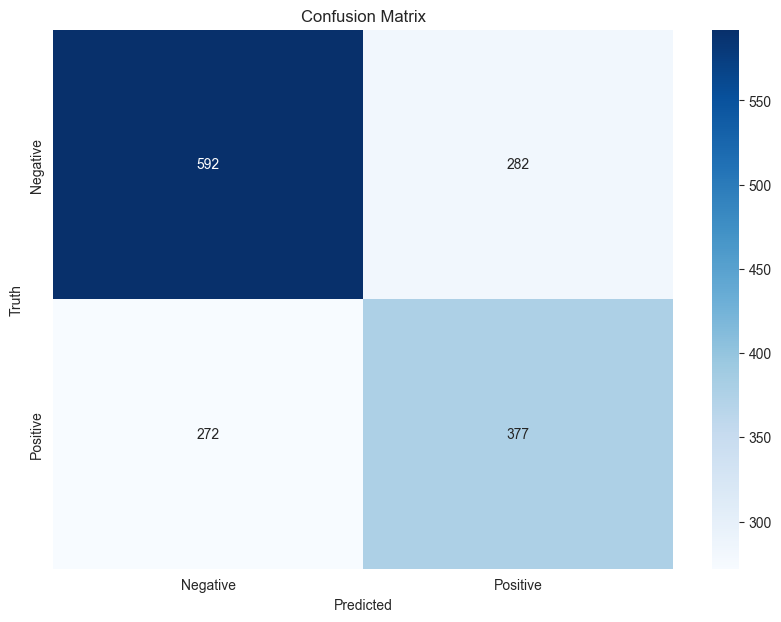

In [49]:
print(classification_report(y_test,y_pred))
show_confusion_matrix(cm)

In [50]:
# pattern = re.compile(r'https?://\S+|www\.\S+')
# for t in df_train.text:
#     matches = pattern.findall(t)
#     for match in matches:
#         print(t)
#         print(match)
#         print(pattern.sub())
